In [2]:
#!pip install git+https://github.com/suvarchal/hutil.git

In [55]:
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import shapely
# Import hutil
import hutil
from hutil import selection

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the catalog|
print("Loading the Digital Earth Hackathon catalog...")
current_location = "online"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]

# List available datasets
print("\nAvailable datasets in the catalog:")
print(list(cat))

# Select a dataset (ICON model)
dataset_name = "icon_d3hp003"
print(f"\nLoading {dataset_name} dataset with zoom level 7 (approx. 50km resolution)...")

# Load the dataset with zoom level 7 (approx. 50km resolution)
ds = cat[dataset_name](zoom=7).to_dask()

Loading the Digital Earth Hackathon catalog...

Available datasets in the catalog:
['CERES_EBAF', 'ERA5', 'IR_IMERG', 'JRA3Q', 'MERRA2', 'arp-gem-1p3km', 'arp-gem-2p6km', 'casesm2_10km_nocumulus', 'icon_d3hp003', 'icon_d3hp003aug', 'icon_d3hp003feb', 'icon_ngc4008', 'ifs_tco3999-ng5_deepoff', 'ifs_tco3999-ng5_rcbmf', 'ifs_tco3999-ng5_rcbmf_cf', 'ifs_tco3999_rcbmf', 'nicam_220m_test', 'nicam_gl11', 'scream-dkrz', 'tracking-d3hp003', 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest', 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest', 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest', 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest', 'um_glm_n1280_CoMA9_TBv1p2', 'um_glm_n1280_GAL9', 'um_glm_n2560_RAL3p3']

Loading icon_d3hp003 dataset with zoom level 7 (approx. 50km resolution)...


In [56]:
ds

<xarray.Dataset> Size: 98GB
Dimensions:        (time: 425, cell: 196608, crs: 1, pressure: 30,
                    soil_level: 5, pressure_rva: 3)
Coordinates:
  * crs            (crs) float32 4B nan
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
  * time           (time) datetime64[ns] 3kB 2020-01-02 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/58)
    clivi          (time, cell) float32 334MB ...
    clt            (time, cell) float32 334MB ...
    clwvi          (time, cell) float32 334MB ...
    egpvi          (time, cell) float32 334MB ...
    einvi          (time, cell) float32 334MB ...
    ekhvi          (time, cell) float32 334MB ...
    ...             ...
    ua             (time, pressure, cell) float32 10GB ...
    uas            (time, cell) float32 334MB ...
    va             (time, pressure, cell) float32 10GB ...
    vas            (time, cell) float32 334MB ...
    wa             (time, pressure, cell) float32 10GB ...
    zg             (time, pressure, cell) float32 10GB ...

In [57]:
var_name = "ts"
da = ds[var_name].isel(time=0)

In [58]:

# Get HEALPix information using the accessor
nside, nest, npix = da.hutil.get_info()
print(f"HEALPix info: nside={nside}, nest={nest}, npix={npix}")

# Add latitude and longitude coordinates using the accessor
da_accessor = da.hutil.add_latlon_coords()
print("Added lat/lon coordinates to dataset using accessor")


HEALPix info: nside=128, nest=True, npix=196608
Added lat/lon coordinates to dataset using accessor


In [59]:
da_sel = da.hutil.select_region(    lat_min=-35, lat_max=35,
    lon_min=-20, lon_max=55
)

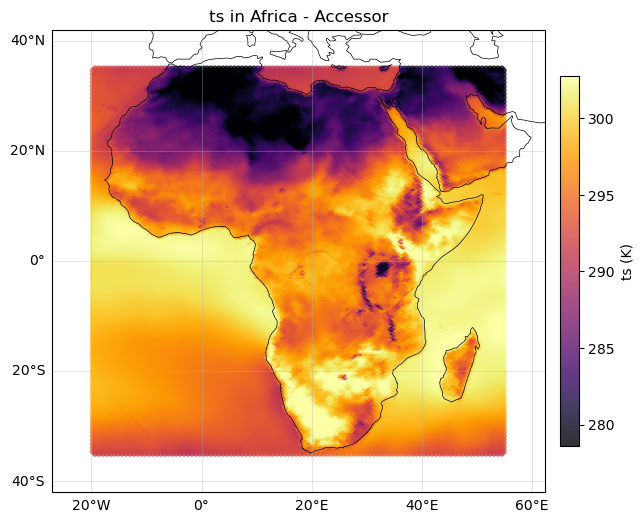

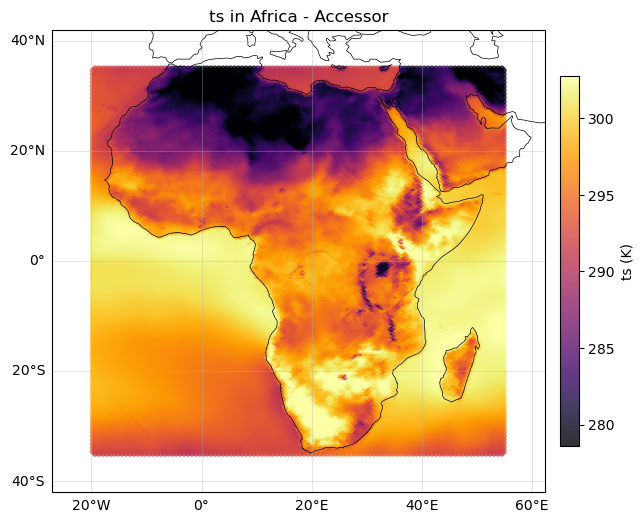

In [60]:
# Plot the selected data using the accessor# Plot the selected data# Plot the selected data using the accessor
#plt.figure(figsize=(12, 8)) 
da_sel.hutil.plot(title=f"{var_name} in Africa - Accessor", cmap="inferno")

In [61]:
#wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
#unzip ne_10m_admin_0_boundary_lines_land.zip

In [62]:
import geopandas as gpd
gdf = gpd.GeoDataFrame.from_file("ne_10m_admin_0_countries.shp")

<Axes: >

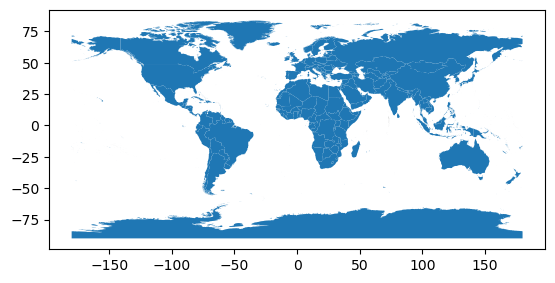

In [63]:
gdf.plot()

In [64]:
gdf_uganda = gdf.loc[gdf['NAME'] == 'Uganda']
print(gdf_uganda.head())

          featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
132  Admin-0 country          0          3     Uganda    UGA         0      2   

                  TYPE TLC   ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
132  Sovereign country   1  Uganda  ...      None       None      None   

    FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
132      None       None      None      None       None      None   

                                              geometry  
132  POLYGON ((30.47179 -1.06684, 30.46083 -1.06343...  

[1 rows x 169 columns]


<Axes: >

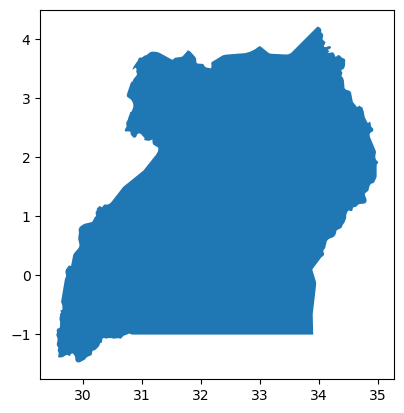

In [65]:
gdf_uganda.plot()

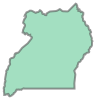

In [66]:
gdf_uganda.polygonize()[0]

In [67]:
ts_uganda=hutil.select_within_polygon(da_sel, gdf_uganda.polygonize()[0])

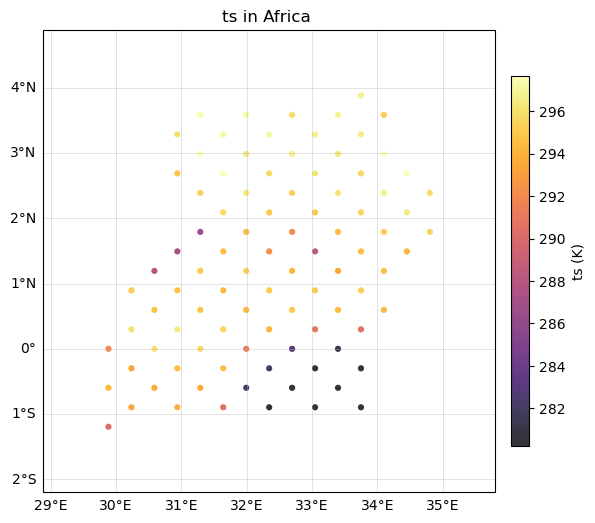

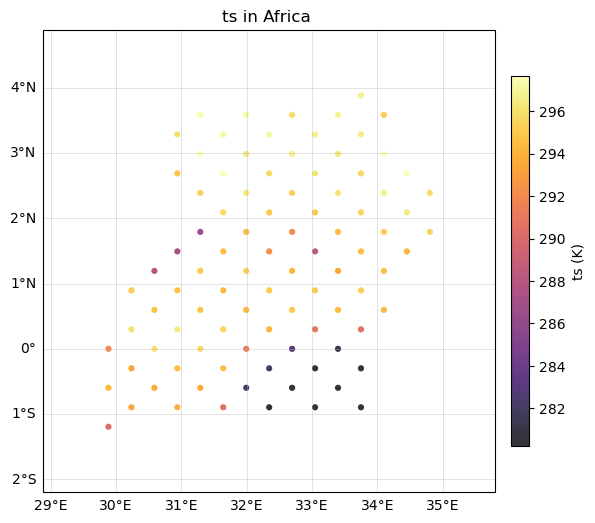

In [69]:
ts_uganda.hutil.plot(title=f"{var_name} in Africa ", cmap="inferno")